<a href="https://colab.research.google.com/github/7beunseo/AI-assignment/blob/main/fin/Cifar10/Cifar10_only_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

X_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000, 1)
X_test.shape: (10000, 32, 32, 3)
y_test.shape: (10000, 1)
train_labels.shape (one-hot) = (50000, 10)
test_labels.shape (one-hot) = (10000, 10)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1024)                │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,939,338 (15.03 MB)

 Trainable params: 3,939,338 (15.03 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 99ms/step - accuracy: 0.2517 - loss: 2.1328
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 87ms/step - accuracy: 0.3956 - loss: 1.6967
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 87ms/step - accuracy: 0.4297 - loss: 1.5971
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 89ms/step - accuracy: 0.4600 - loss: 1.5129
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 88ms/step - accuracy: 0.4735 - loss: 1.4712
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 36s 92ms/step - accuracy: 0.4910 - loss: 1.4178
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 92ms/step - accuracy: 0.5065 - loss: 1.3799
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 90ms/step - accuracy: 0.5186 - loss: 1.3421
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 90ms/step - accuracy: 0.5340 - loss: 1.3083
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 87ms/step - accuracy: 0.5430 - loss: 1.2861

테스트 정확도: 0.5121999979019165


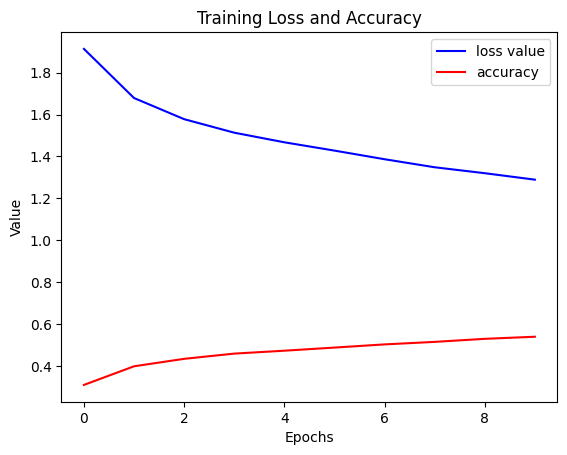

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


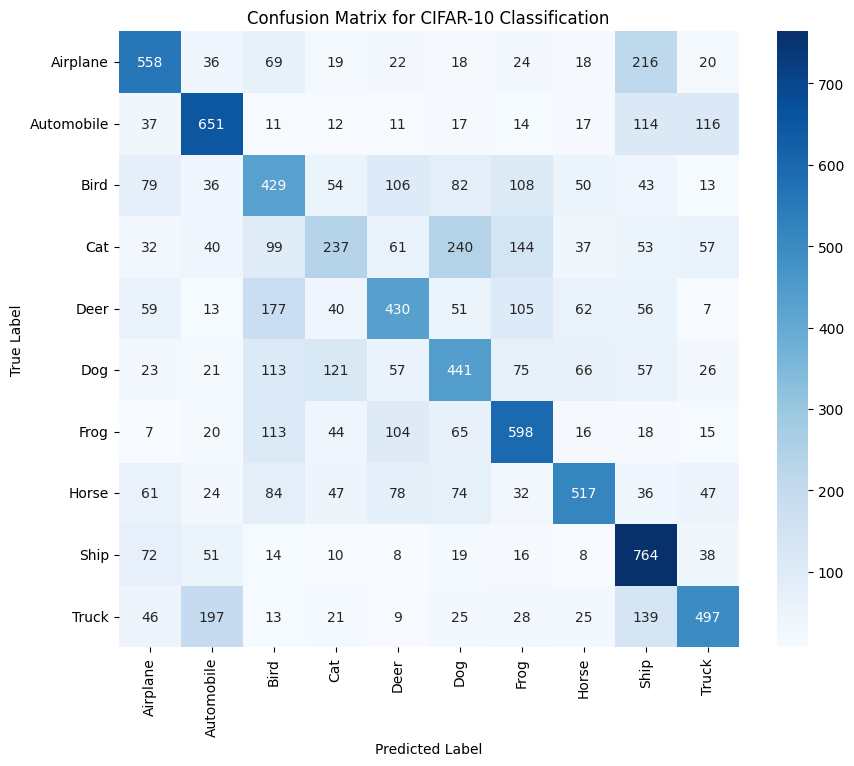

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


class_names = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer",
    "Dog", "Frog", "Horse", "Ship", "Truck"
]

# 데이터를 학습용, 테스트 데이터로 구분하여 읽어옴
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# 데이터의 모양 확인하기
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)

# X_train.shape: (50000, 32, 32, 3) 50000장, 32 x 32 사이즈 (w x h), 컬러 (3 channel)
# y_train.shape: (50000, 1) 답 -> 하나의 열 (종류의 개수와 상관 없음)
# X_test.shape: (10000, 32, 32, 3)
# y_test.shape: (10000, 1)

# 데이터 시각화 (잘 불러와졌는지 확인)
# plt.figure(figsize=(10, 2))
# for i in range(5):
#     plt.subplot(1, 5, i + 1)
#     plt.imshow(X_train[i])
#     plt.title(class_names[y_train[i][0]])  # CIFAR-10 클래스 이름 표시
#     plt.axis('off')
# plt.show()
#
# fig = plt.figure()
# ax1 = fig.add_subplot(1, 4, 1)
# ax2 = fig.add_subplot(1, 4, 2)
# ax3 = fig.add_subplot(1, 4, 3)
# ax4 = fig.add_subplot(1, 4, 4)

# 레이블을 one-hot encoding으로 변환
# 분류해야 할 개수가 3개 이상이므로 원핫 인코딩을 사용함 (총 10가지 클래스)
train_labels = keras.utils.to_categorical(y_train, 10) # 라벨 10가지
test_labels = keras.utils.to_categorical(y_test, 10)

print('train_labels.shape (one-hot) =', train_labels.shape)
print('test_labels.shape (one-hot) =', test_labels.shape)
# train_labels.shape (one-hot) = (50000, 10)
# test_labels.shape (one-hot) = (10000, 10)

# 데이터 전처리 - 0에서 1 사이의 값으로 입력 데이터를 가공함 (0~1 사이의 값으로, 정규화한다 -> 실수화)
train_images, test_images = X_train / 255, X_test / 255

# train_images = X_train[:, :, :, np.newaxis]
# test_images = X_test[:, :, :, np.newaxis]
# train_images, test_images = train_images / 255, test_images / 255

# MLP 구현
model = keras.Sequential([
    # 3D 이미지를 펼침
   keras.layers.Flatten(input_shape=(32, 32, 3)), # 32 x 32 x 3 (컬러 이미지)
    # 완전 연결층
   keras.layers.Dense(1024, activation='relu'),
   keras.layers.Dense(512, activation='relu'),
   keras.layers.Dense(512, activation='relu'),
    # 10개의 분류, 출력층도 Dense로 구현
   keras.layers.Dense(10, activation='softmax') # 다중 클래스이므로 softmax 사용
])

model.summary()   # 모델의 구조를 요약하여 살펴보자
# Model: "sequential"
# ┌─────────────────────────────────┬────────────────────────┬───────────────┐
# │ Layer (type)                    │ Output Shape           │       Param # │
# ├─────────────────────────────────┼────────────────────────┼───────────────┤
# │ flatten (Flatten)               │ (None, 3072)           │             0 │
# ├─────────────────────────────────┼────────────────────────┼───────────────┤
# │ dense (Dense)                   │ (None, 1024)           │     3,146,752 │ 3,145,728 (32 x 32 x 1024 원래 연결선 개수)
# ├─────────────────────────────────┼────────────────────────┼───────────────┤
# │ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
# ├─────────────────────────────────┼────────────────────────┼───────────────┤
# │ dense_2 (Dense)                 │ (None, 512)            │       262,656 │
# ├─────────────────────────────────┼────────────────────────┼───────────────┤
# │ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
# └─────────────────────────────────┴────────────────────────┴───────────────┘

#  Total params: 3,939,338 (15.03 MB) -> 학습해야 하는 개수
#  Trainable params: 3,939,338 (15.03 MB)
#  Non-trainable params: 0 (0.00 B)

# 최적화 함수 adam
# 손실 함수 categorical_crossentropy (다중 클래스, 원 핫 인코딩을 했을 경우 분류에서 사용)
model.compile(optimizer='adam',\
             loss='categorical_crossentropy',
             metrics=['accuracy'])

hist = model.fit(train_images, train_labels, epochs=10, verbose=1, batch_size=128)

# 테스트 데이터를 이용하여 분류모델의 정확도 평가
test_loss, test_acc = model.evaluate(test_images,  test_labels,\
                                     verbose=0)

print('\n테스트 정확도:', test_acc)
plt.plot(hist.history['loss'], 'b-', label = "loss value")
plt.plot(hist.history['accuracy'], 'r-', label='accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Training Loss and Accuracy')
plt.show()

# 모델 저장
model.save('cifar10_model.h5')


# 혼동행렬
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 테스트 데이터에 대해 예측 수행
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# 혼동 행렬 계산
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# 혼동 행렬 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for CIFAR-10 Classification')
plt.show()